In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from music21 import *
from fractions import Fraction
seed =0 
torch.manual_seed(seed)

# Import data

In [2]:
class MusicDataset(torch.utils.data.Dataset):

    def __init__(self, right, left, Y, transform = None):
        self.right = right
        self.left = left
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, idx):
        return self.right[idx], self.left[idx], self.Y[idx]
    

def generate_data_loader(right_data, left_data, labels, batch_size):
    
    X = np.arange(right_data.shape[0])
    y = labels
    X_trainval, X_test, y_trainval, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=23)
    
    # Split train into train-val
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=0.2, stratify=y_trainval, random_state=42)

    right_train = right_data[X_train]
    right_val = right_data[X_val]
    right_test = right_data[X_test]
    
    left_train = left_data[X_train]
    left_val = left_data[X_val]
    left_test = left_data[X_test]    
    
    train_data = MusicDataset(torch.from_numpy(right_train).float(), 
                              torch.from_numpy(left_train).float(), 
                             torch.from_numpy(y_train).float())
    val_data = MusicDataset(torch.from_numpy(right_val).float(), 
                            torch.from_numpy(left_val).float(),
                           torch.from_numpy(y_val).float())
    test_data = MusicDataset(torch.from_numpy(right_test).float(),
                             torch.from_numpy(left_test).float(),
                            torch.from_numpy(y_test).float())
        
    train_loader = torch.utils.data.DataLoader(
        train_data, batch_size=batch_size, shuffle=False)
    val_loader = torch.utils.data.DataLoader(
        val_data, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(
        test_data, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

In [3]:
right_data = np.load('/Users/fionawu/Documents/2022_Fall/ECE685_Deep_Learning/project/preprocess_data/right_data_small.npy')
left_data = np.load('/Users/fionawu/Documents/2022_Fall/ECE685_Deep_Learning/project/preprocess_data/left_data_small.npy')
labels = np.load('/Users/fionawu/Documents/2022_Fall/ECE685_Deep_Learning/project/preprocess_data/labels_small.npy')
batch_size = 64
train_loader, val_loader, test_loader = generate_data_loader(right_data, left_data, labels, batch_size)

In [4]:
tdict = {0.25: 0,
 0.5: 1,
 0.75: 2,
 1.0: 3,
 1.25: 4,
 1.5: 5,
 1.75: 6,
 2.0: 7,
 2.25: 8,
 2.5: 9,
 2.75: 10,
 3.0: 11,
 3.25: 12,
 4.0: 13,
 5.0: 14,
 6.0: 15,
 3.5: 16,
 3.75: 17,
 4.25: 18,
 4.5: 19,
 4.75: 20,
 5.25: 21,
 5.5: 22,
 7.0: 23,
 Fraction(1, 6): 24,
 Fraction(5, 12): 25,
 Fraction(2, 3): 26,
 Fraction(5, 3): 27,
 Fraction(23, 12): 28,
 Fraction(8, 3): 29,
 Fraction(11, 3): 30,
 Fraction(1, 3): 31,
 Fraction(1, 12): 32,
 Fraction(5, 6): 33,
 Fraction(4, 3): 34,
 Fraction(7, 3): 35,
 Fraction(10, 3): 36}

In [5]:
pdict = {24: 0,
 25: 1,
 26: 2,
 27: 3,
 28: 4,
 29: 5,
 30: 6,
 31: 7,
 32: 8,
 33: 9,
 34: 10,
 35: 11,
 36: 12,
 37: 13,
 38: 14,
 39: 15,
 40: 16,
 41: 17,
 42: 18,
 43: 19,
 44: 20,
 45: 21,
 46: 22,
 47: 23,
 48: 24,
 49: 25,
 50: 26,
 51: 27,
 52: 28,
 53: 29,
 54: 30,
 55: 31,
 56: 32,
 57: 33,
 58: 34,
 59: 35,
 60: 36,
 61: 37,
 62: 38,
 63: 39,
 64: 40,
 65: 41,
 66: 42,
 67: 43,
 68: 44,
 69: 45,
 70: 46,
 71: 47,
 72: 48,
 73: 49,
 74: 50,
 75: 51,
 76: 52,
 77: 53,
 78: 54,
 79: 55,
 80: 56,
 81: 57,
 82: 58,
 83: 59,
 84: 60,
 85: 61,
 86: 62,
 87: 63,
 88: 64,
 89: 65,
 90: 66,
 91: 67,
 92: 68,
 93: 69,
 94: 70,
 95: 71,
 96: 72,
 97: 73,
 98: 74,
 99: 75,
 100: 76,
 101: 77}

In [6]:
vdict = {20: 0,
 21: 1,
 22: 2,
 23: 3,
 24: 4,
 25: 5,
 26: 6,
 27: 7,
 28: 8,
 29: 9,
 30: 10,
 31: 11,
 32: 12,
 33: 13,
 34: 14,
 35: 15,
 36: 16,
 37: 17,
 38: 18,
 39: 19,
 40: 20,
 41: 21,
 42: 22,
 43: 23,
 44: 24,
 45: 25,
 46: 26,
 47: 27,
 48: 28,
 49: 29,
 50: 30,
 51: 31,
 52: 32,
 53: 33,
 54: 34,
 55: 35,
 56: 36,
 57: 37,
 58: 38,
 59: 39,
 60: 40,
 61: 41,
 62: 42,
 63: 43,
 64: 44,
 65: 45,
 66: 46,
 67: 47,
 68: 48,
 69: 49,
 70: 50,
 71: 51,
 72: 52,
 73: 53,
 74: 54,
 75: 55,
 76: 56,
 77: 57,
 78: 58,
 79: 59,
 80: 60,
 81: 61,
 82: 62,
 83: 63,
 84: 64,
 85: 65,
 86: 66,
 87: 67,
 88: 68,
 89: 69,
 90: 70,
 91: 71,
 92: 72,
 93: 73,
 94: 74,
 95: 75}

In [7]:
id2tdict = {i:t for t,i in tdict.items()}
id2pdict = {i:p for p,i in pdict.items()}
id2vdict = {i:v for v,i in vdict.items()}

# Model Architecture

In [13]:
class CVAE(nn.Module):
    def __init__(self,p_in,d_in,p_h,d_h,n_hid_1,n_hid_2,n_hid_3,n_hid_4,z_dim):  
        super(CVAE, self).__init__()
        
        ##################################### encode layer #####################################
        ### parallel LSTM 
        self.classes = 3 
        self.num_nodes = 50
        
        # LSTM for pitch  
        self.en_p = nn.LSTM(input_size = p_in+self.classes,
                                hidden_size = p_h,
                                num_layers= 1,
                                batch_first=True,
                                bidirectional = False) 
        
        self.en_bn_p = nn.BatchNorm1d(self.num_nodes, affine=False)
        
        # LSTM for duration 
        self.en_d = nn.LSTM(input_size = d_in+self.classes,
                                hidden_size = d_h,
                                num_layers= 1,
                                batch_first=True,
                                bidirectional = False) 
         
        self.en_bn_d = nn.BatchNorm1d(self.num_nodes, affine=False)
        
        
        ### dense
        
        self.en_d1  = nn.Linear(3000,n_hid_2)  # 5000 = 50*60 , n_hid_2= 2000
        self.dropout = nn.Dropout(p=0.5)
        
        self.en_d2  = nn.Linear(n_hid_2,n_hid_3) # n_hid_3 =1000
        
        self.en_d3  = nn.Linear(n_hid_3,n_hid_4) # n_hid_4 = 500
        
        self.en_mu = nn.Linear(n_hid_4,z_dim)  # z_dim= 50
        self.en_var = nn.Linear(n_hid_4,z_dim)  
        
        ##################################### decode layer #####################################
        ### dense 
        self.de_d1= nn.Linear(z_dim+self.classes,n_hid_4)
        self.de_bn_d1 = nn.BatchNorm1d(n_hid_4, affine=False)
        
        self.de_d2_p= nn.Linear(n_hid_4,n_hid_3)
        self.de_bn_d2p = nn.BatchNorm1d(n_hid_3, affine=False)
        self.de_d2_d= nn.Linear(n_hid_4,n_hid_3)
        self.de_bn_d2d = nn.BatchNorm1d(n_hid_3, affine=False)
    
        
        self.de_d3_p= nn.Linear(n_hid_3,n_hid_2)
        self.de_bn_d3p = nn.BatchNorm1d(n_hid_2, affine=False)
        self.de_d3_d= nn.Linear(n_hid_3,n_hid_2)
        self.de_bn_d3d = nn.BatchNorm1d(n_hid_2, affine=False)
    
        
        ### parallel LSTM 
        self.de_p = nn.LSTM(input_size = n_hid_1,
                             hidden_size= p_in,
                             num_layers=1,
                             batch_first=True,
                             bidirectional = False)
        
        self.de_bn_p = nn.BatchNorm1d(self.num_nodes, affine=False)
        
        
        self.de_d = nn.LSTM(input_size = n_hid_1,
                             hidden_size= d_in,
                             num_layers=1,
                             batch_first=True,
                             bidirectional = False)
        
        self.de_bn_d = nn.BatchNorm1d(self.num_nodes, affine=False)
        
        
    
        
        
        
    def parallel_lstm(self,xp,xd,label):
        
        ### concat x with label 
        xp_c = torch.cat((xp,label),dim=2)
        xd_c = torch.cat((xd,label),dim=2)
        
        output_p,_ = self.en_p(xp_c)
        output_p = F.relu(self.en_bn_p(output_p))

        output_d,_ = self.en_d(xd_c)
        output_d = F.relu(self.en_bn_d(output_d))
        
        
        return output_p,output_d
        
    def dense(self,xp,xd,label):
        
        output_p,output_d = self.parallel_lstm(xp,xd,label)
        output = torch.cat((output_p,output_d),dim=-1)  # batch_size*50*60 
        output = output.view(output.size(0),-1)  # convert to batch_size* 3000
        output = self.dropout(output)
        
        dense_1 = self.en_d1(output)
        dense_1 = F.relu(self.dropout(dense_1))
        
        dense_2 = self.en_d2(dense_1)
        dense_2 = F.relu(self.dropout(dense_2))
        
        dense_3 = self.en_d3(dense_2)
        dense_3 = F.relu(dense_3)
       
        return dense_3
    
    def encode(self,xp,xd,label):
        dense=self.dense(xp,xd,label)
        mu = self.en_mu(dense)
        logvar = self.en_var(dense) 
        return mu,logvar
    
    def reparameterize(self, mu, logvar):
        
        stdev = torch.exp(0.5*logvar)
        eps = torch.randn_like(stdev)
        z= mu + eps*stdev
        return z 
    
    def decode(self, z, label):
        
        ### concate z with label 
        z= torch.cat((z,label),dim=-1) # z_dim =53
        out = self.de_d1(z) 
        out = F.relu(self.de_bn_d1(out))
        
        out_p1 = self.de_d2_p(out)
        out_p1 = F.relu(self.de_bn_d2p(out_p1))
        out_d1 = self.de_d2_d(out)
        out_d1 = F.relu(self.de_bn_d2d(out_d1))
      
        
        out_p2 = self.de_d3_p(out_p1)
        out_p2 = F.relu(self.de_bn_d3p(out_p2))
        out_d2 = self.de_d3_d(out_d1)
        out_d2 = F.relu(self.de_bn_d3d(out_d2))
        
        out_p=out_p2.view(out_p2.size(0),50,40)
        out_d=out_d2.view(out_d2.size(0),50,40)
  
        
        decode_p,_=self.de_p(out_p)
        decode_p = self.de_bn_p(decode_p)
        decode_d,_=self.de_d(out_d)
        decode_d = self.de_bn_d(decode_d)
        
        new_p = torch.softmax(decode_p,dim=2)   # softmax for pitch 
        new_d = torch.softmax(decode_d,dim=2) # softmax for pitch duration  
        output = torch.cat((new_p, new_d), dim=2)
    
        return output
    
    def forward(self,data,label_3d,label):
        pitch = data[:,:,:p_in]
        duration = data[:,:,p_in:p_in+d_in]
        
        mu,logvar = self.encode(pitch,duration,label_3d)
        z = self.reparameterize(mu,logvar)
        output = self.decode(z,label)
        
        return output,mu,logvar

In [9]:
def loss_function(recon_data, data, mu, logvar):
    CE = F.cross_entropy(recon_data, data) # BCE = -Negative Log-likelihood
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) # KL Divergence b/w q_\phi(z|x) || p(z)
    return CE + KLD

In [10]:
def train(model,optimizer,train_loader):
    train_loss = 0
    BCE_right_loss = 0 
    BCE_left_loss = 0
    KLD_loss = 0 
    model.train()
    criterion  = nn.MSELoss()
    for idx, (right_data,left_data,label) in enumerate(train_loader):
        ## preprocess label 
        data = right_data[:,:,0:len(pdict)+len(tdict)] ## only choose right data to be data 
        label_3d=torch.unsqueeze(label,1)
        label_3d=label_3d.repeat_interleave(50,dim=1) 
        ### 
        optimizer.zero_grad()
        output,mu,logvar = model(data,label_3d,label)
       
        loss = loss_function(output,data, mu,logvar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    return  train_loss/len(train_loader)

def val(model,val_loader):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for idx, (right_data,left_data,label) in enumerate(val_loader):
            data = right_data[:,:,0:len(pdict)+len(tdict)]
            label_3d=torch.unsqueeze(label,1)
            label_3d=label_3d.repeat_interleave(50,dim=1) 
            
            output,mu,logvar = model(data,label_3d,label)
            
            loss = loss_function(output,data, mu,logvar)
            val_loss += loss.item() # sum up batch loss
   
        return val_loss/len(val_loader)

def plot_loss(train_loss,val_loss):
    
    X=range(1,len(train_loss)+1)
    plt.plot(X,train_loss,"-b",label="Train")
    plt.plot(X,val_loss,"-r",label="Val")
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [11]:
p_in = 78
d_in = 37
p_h = 39
d_h = 21
n_hid_1= 40
n_hid_2= 2000
n_hid_3 =1000
n_hid_4 = 500
z_dim= 50
num_epochs = 100
lr = 0.0001
decay = 0.0001

for epoch 1, train loss is 6.6898626940591
for epoch 1, validation loss is 5.064579214368548
for epoch 2, train loss is 4.387482132230486
for epoch 2, validation loss is 4.599392482212612
for epoch 3, train loss is 4.225379765033722
for epoch 3, validation loss is 4.53525618144444
for epoch 4, train loss is 4.159367135592869
for epoch 4, validation loss is 4.466428824833462
for epoch 5, train loss is 4.117720927510943
for epoch 5, validation loss is 4.413926192692348
for epoch 6, train loss is 4.091250836849213
for epoch 6, validation loss is 4.343585286821638
for epoch 7, train loss is 4.072756026472364
for epoch 7, validation loss is 4.27097225189209
for epoch 8, train loss is 4.0570874725069315
for epoch 8, validation loss is 4.206090382167271
for epoch 9, train loss is 4.0446354406220575
for epoch 9, validation loss is 4.152449403490339
for epoch 10, train loss is 4.034784095627921
for epoch 10, validation loss is 4.107126099722726
for epoch 11, train loss is 4.0274185453142435
for

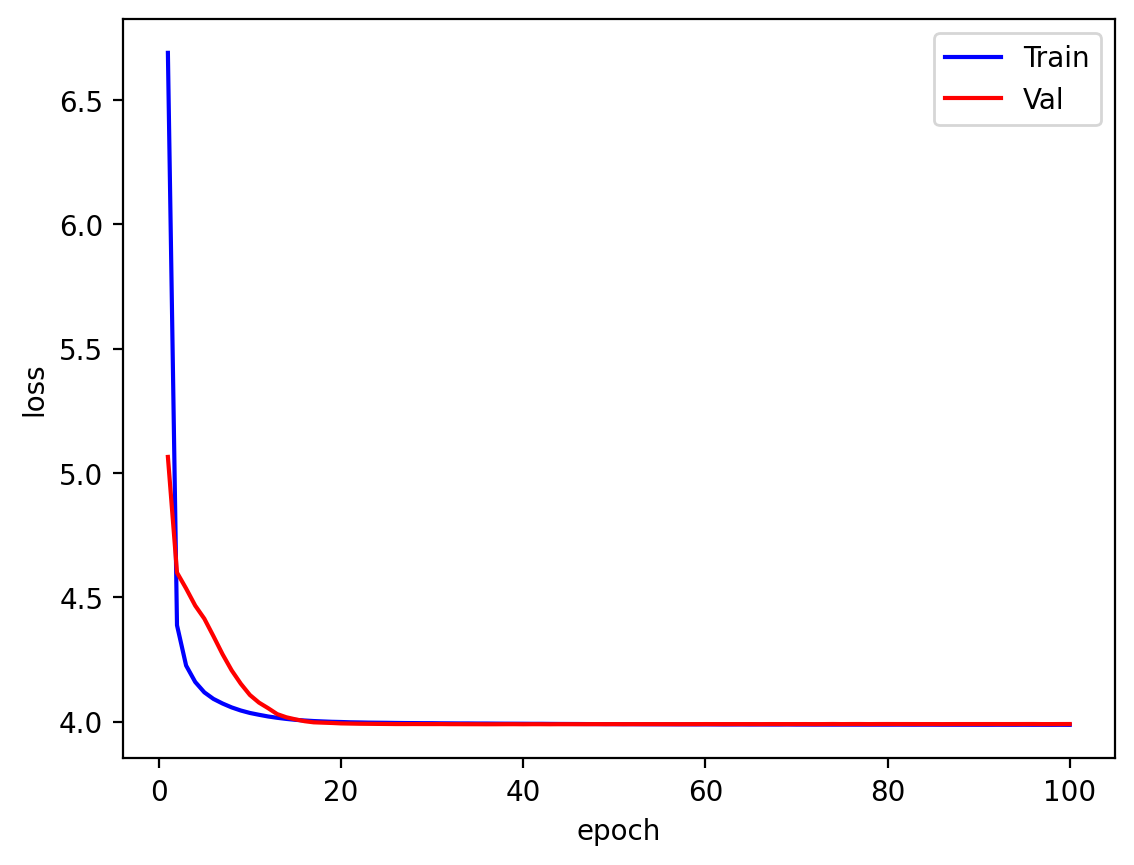

In [14]:
train_loss_all=[]
val_loss_all = [] 
torch.autograd.set_detect_anomaly(True)

model=CVAE(p_in,d_in,p_h,d_h,n_hid_1,n_hid_2,n_hid_3,n_hid_4,z_dim)
optimizer= optim.Adam(model.parameters(),lr= lr, weight_decay= decay)
for epoch in range(1, num_epochs + 1):
    train_loss = train(model,optimizer,train_loader)
    train_loss_all.append(train_loss)
    print("for epoch {}, train loss is {}".format(epoch,train_loss))
    val_loss = val(model,val_loader)
    val_loss_all.append(val_loss)
    print("for epoch {}, validation loss is {}".format(epoch,val_loss))
plot_loss(train_loss_all,val_loss_all)

In [15]:
model

CVAE(
  (en_p): LSTM(81, 39, batch_first=True)
  (en_bn_p): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (en_d): LSTM(40, 21, batch_first=True)
  (en_bn_d): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (en_d1): Linear(in_features=3000, out_features=2000, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (en_d2): Linear(in_features=2000, out_features=1000, bias=True)
  (en_d3): Linear(in_features=1000, out_features=500, bias=True)
  (en_mu): Linear(in_features=500, out_features=50, bias=True)
  (en_var): Linear(in_features=500, out_features=50, bias=True)
  (de_d1): Linear(in_features=53, out_features=500, bias=True)
  (de_bn_d1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (de_d2_p): Linear(in_features=500, out_features=1000, bias=True)
  (de_bn_d2p): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (de_d2_d): Linear(in_features=5

# Reconstruct evaluation

In [18]:
def convert2notes(pid, tid, offset,right=True):

    result = note.Note(id2pdict[pid])
    result.offset = offset
    result.storedInstrument = instrument.Piano()
    result.duration.quarterLength = id2tdict[tid]

    return result

def construct_music(output,name):
    
    output = output.squeeze()
    output_p = output[:,:len(pdict)]
    output_t = output[:,len(pdict):len(pdict)+len(tdict)]

    p = torch.argmax(output_p, dim=1).detach()
    t = torch.argmax(output_t, dim=1).detach()
    
    notes = []
    offset = 0
    for pid, tid in zip(p,t):

        n = convert2notes(pid.item(), tid.item(), offset)
        offset += n.duration.quarterLength
        notes.append(n)

    midi_stream = stream.Stream(notes)
    midi_stream.write('midi', fp= name)

In [19]:
#### reconstruct 
right_data, left_data, label= next(iter(train_loader))
right_data = right_data[1:2]
data = right_data
left_data = left_data[1:2]
label = label[1:2]
label_3d=torch.unsqueeze(label,1)
label_3d=label_3d.repeat_interleave(50,dim=1) 
model.eval()
output, mu,logvar = model(data,label_3d,label)

construct_music(output,'test.mid')

# Music Generation

In [20]:
z = torch.randn([1, z_dim])
prob = torch.tensor([0.6, 0.2, 0.2])
label=torch.unsqueeze(prob,0)
#label=label.repeat_interleave(50,dim=0)
model.eval()
output = model.decode(z,label)
construct_music(output,'music_cvae_2rolls.mid')